In [2]:
import numpy as np

import torch

def get_spatial_2d_sincos_pos_embed(grid_size, embed_dim, cls_token=False):

    # Create meshgrid for x and y positions
    x = np.linspace(0, 2 * np.pi, grid_size)
    y = np.linspace(0, 2 * np.pi, grid_size)
    x_grid, y_grid = np.meshgrid(x, y)

    # Initialize positional embedding array
    pos_embed = np.zeros((grid_size, grid_size, embed_dim))

    # Compute the positional embeddings using sine and cosine functions
    for i in range(0, embed_dim, 2):
        pos_embed[:, :, i] = np.sin((i // 2 + 1) * x_grid) + np.sin((i // 2 + 1) * y_grid)
        if i + 1 < embed_dim:
            pos_embed[:, :, i + 1] = np.cos((i // 2 + 1) * x_grid) + np.cos((i // 2 + 1) * y_grid)
    return pos_embed


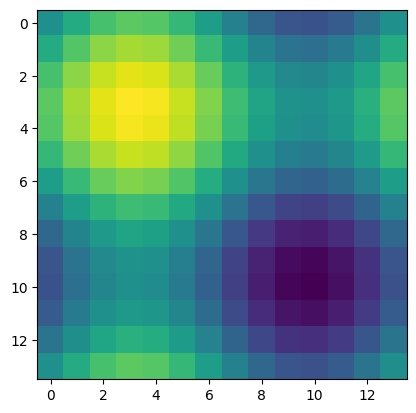

In [3]:
from matplotlib import pyplot as plt
pos_embed = get_spatial_2d_sincos_pos_embed(14, 256)

for i in range(1):
    plt.figure()
    plt.imshow(pos_embed[:, :, i], cmap='viridis')

In [4]:
pos_embed.shape

(14, 14, 256)

In [5]:
import numpy as np

def get_2d_sincos_pos_embed(embed_dim, grid_size, cls_token=False):
    """
    grid_size: int of the grid height and width
    return:
    pos_embed: [grid_size*grid_size, embed_dim] or [1+grid_size*grid_size, embed_dim] (w/ or w/o cls_token)
    """
    grid_h = np.arange(grid_size, dtype=np.float32)
    grid_w = np.arange(grid_size, dtype=np.float32)
    grid = np.meshgrid(grid_w, grid_h)  # here w goes first
    grid = np.stack(grid, axis=0)

    grid = grid.reshape([2, 1, grid_size, grid_size])
    pos_embed = get_2d_sincos_pos_embed_from_grid(embed_dim, grid)
    if cls_token:
        pos_embed = np.concatenate([np.zeros([1, embed_dim]), pos_embed], axis=0)
    return pos_embed


def get_2d_sincos_pos_embed_from_grid(embed_dim, grid):
    assert embed_dim % 2 == 0

    # use half of dimensions to encode grid_h
    emb_h = get_1d_sincos_pos_embed_from_grid(embed_dim // 2, grid[0])  # (H*W, D/2)
    emb_w = get_1d_sincos_pos_embed_from_grid(embed_dim // 2, grid[1])  # (H*W, D/2)

    emb = np.concatenate([emb_h, emb_w], axis=1) # (H*W, D)
    return emb


def get_1d_sincos_pos_embed_from_grid(embed_dim, pos):
    """
    embed_dim: output dimension for each position
    pos: a list of positions to be encoded: size (M,)
    out: (M, D)
    """
    assert embed_dim % 2 == 0
    omega = np.arange(embed_dim // 2, dtype=np.float32)
    omega /= embed_dim / 2.
    omega = 1. / 10000**omega  # (D/2,)

    pos = pos.reshape(-1)  # (M,)
    out = np.einsum('m,d->md', pos, omega)  # (M, D/2), outer product

    emb_sin = np.sin(out) # (M, D/2)
    emb_cos = np.cos(out) # (M, D/2)

    emb = np.concatenate([emb_sin, emb_cos], axis=1)  # (M, D)
    return emb


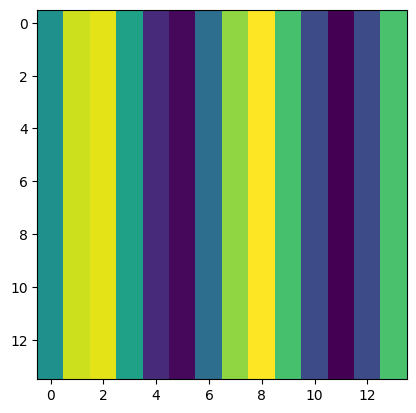

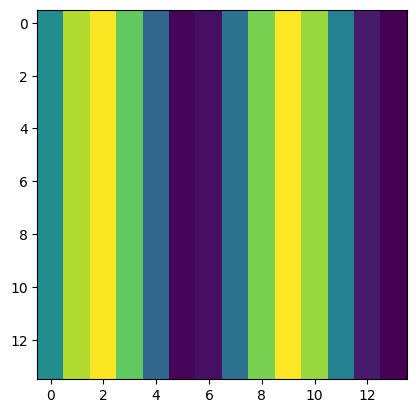

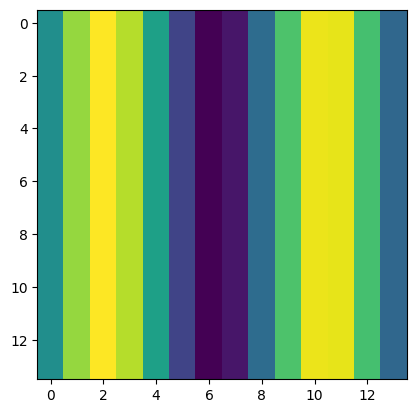

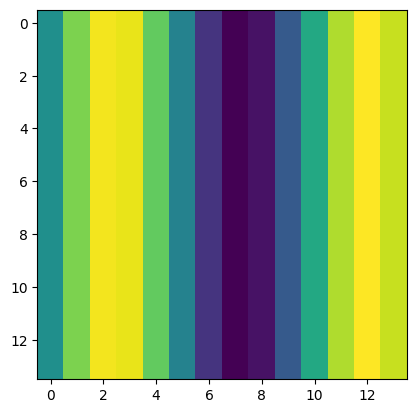

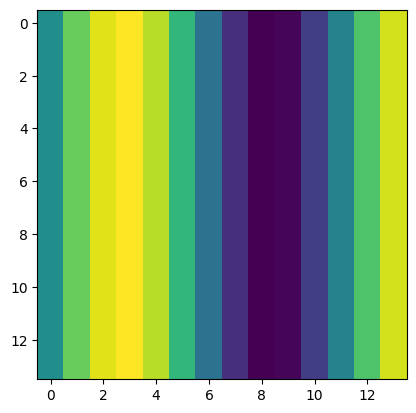

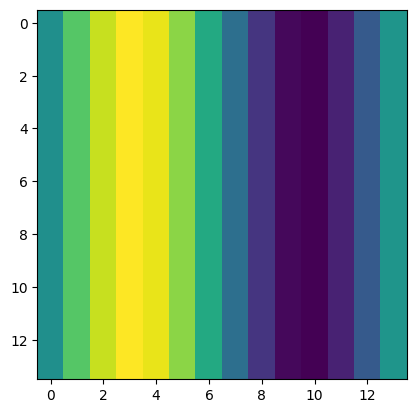

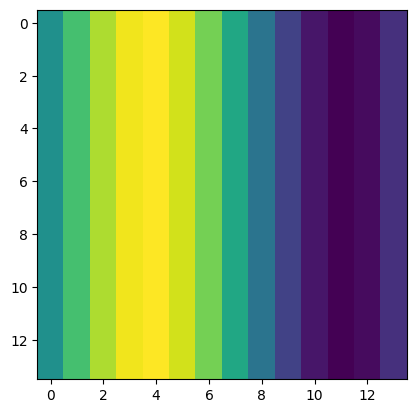

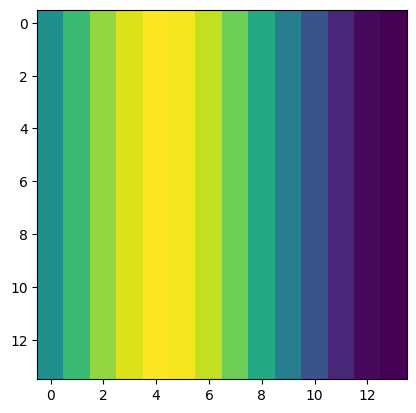

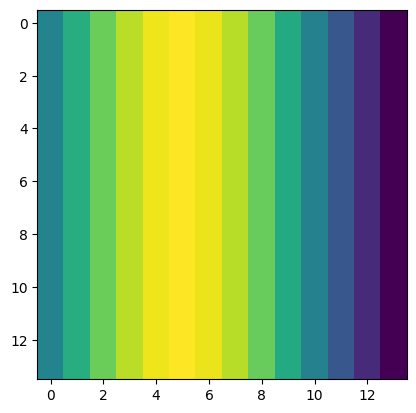

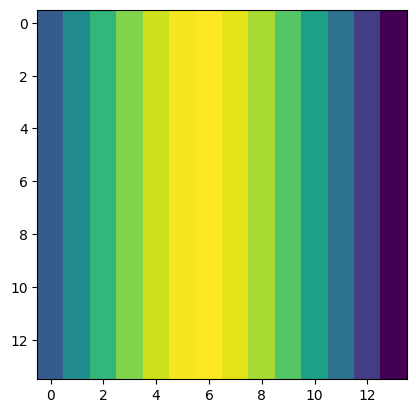

In [6]:
pos_embed = get_2d_sincos_pos_embed(256, 14)
for i in range(10):
    plt.figure()
    plt.imshow(pos_embed[:, i].reshape(14, 14), cmap='viridis')

